In [46]:
import io

import numpy as np
import pandas as pd

import keras

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

In [48]:
import matplotlib.pyplot as plt

In [49]:
dataset_DiagnRatios = pd.read_csv("C:/Users/yuliya/Documents/scientific_research/DiagnRatios.csv")
dataset_EmisionLines = pd.read_csv("C:/Users/yuliya/Documents/scientific_research/EmissionLines.csv")
dataset_OutPar = pd.read_csv("C:/Users/yuliya/Documents/scientific_research/OutPar.csv")
dataset_rion_rout = pd.read_csv("C:/Users/yuliya/Documents/scientific_research/rion_rout.csv")

In [50]:
merged_df_EmDiag = pd.merge(dataset_EmisionLines, dataset_DiagnRatios, on='id', how='inner')  # Inner join

In [51]:
num_rows = merged_df_EmDiag.iloc[:, 1:].isna().all(axis=1).sum()

print(f"Number of rows with NaN in all columns except the first: {num_rows}")

Number of rows with NaN in all columns except the first: 34165


In [52]:
merged_df_EmDiag_filled = merged_df_EmDiag.fillna(merged_df_EmDiag.mean())
print(merged_df_EmDiag_filled.info)

<bound method DataFrame.info of             id  he_1_3889a  he_1_4026a  he_1_4471a  he_1_5876a  n_2_6584a  \
0            1    0.088190     0.01683    0.035220    0.097610   0.011450   
1            2    0.015550     0.00315    0.006650    0.018660   0.018590   
2            3    0.093270     0.01735    0.036590    0.104180   0.055370   
3            4    0.090366     0.01738    0.036457    0.103104   0.011773   
4            5    0.087330     0.01706    0.035730    0.099130   0.014280   
...        ...         ...         ...         ...         ...        ...   
653324  653325    0.090366     0.01671    0.035710    0.102070   0.011773   
653325  653326    0.090366     0.01675    0.035830    0.102800   0.011773   
653326  653327    0.090366     0.01738    0.036457    0.103104   0.011773   
653327  653328    0.090366     0.01738    0.036457    0.103104   0.011773   
653328  653329    0.090366     0.01673    0.035770    0.102440   0.011773   

        he_1_6678a  he_1_7065a  he_2_4686a 

In [53]:
new_df_no_na = dataset_OutPar.dropna()
print(new_df_no_na.shape)

(9514, 18)


In [54]:
input_to_model = pd.merge(merged_df_EmDiag_filled, new_df_no_na, on='id', how='inner')

X = input_to_model.iloc[:, 1:merged_df_EmDiag_filled.shape[1]]
y = input_to_model.iloc[:, merged_df_EmDiag_filled.shape[1]:merged_df_EmDiag_filled.shape[1]+new_df_no_na.shape[1]-1]
print(y.shape)

# Split data (80%-20% split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

(9514, 17)


In [55]:
#model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
nrmse = rmse / (np.max(y_test) - np.min(y_test))

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Normalized RMSE: {nrmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

#model coefficients
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error (MSE): 0.44
Root Mean Squared Error (RMSE): 0.67
Normalized RMSE: 0.0101
Mean Absolute Error (MAE): 0.11
R² Score: -0.12
Model Coefficients: [[ 0.00000000e+00 -1.85354861e-02  3.57893909e+00  2.26599156e+00
   3.78529911e-03 -2.57687562e+00 -3.54760157e+00  2.25035342e-01
  -1.55095950e-01  9.60770182e+06 -1.09365102e+00  3.37214018e-01
  -1.39819427e-01  7.68616146e+07  1.28992591e-01 -1.22047446e-01
   1.51902230e-02 -5.19447348e-02 -7.68616146e+07  1.46458969e-01
   1.92154036e+07  2.06684023e-01  5.30413497e-03  1.24681836e+00
   3.68703663e+00  1.81364383e-04 -1.21918187e+00 -9.99529677e-02
  -8.27857357e-01  4.99358384e-01 -4.71730191e-02  2.36176798e-02
   3.96095274e-03  7.55481960e-06]
 [ 0.00000000e+00  4.35956043e-02  5.38285019e+00  1.09102346e+01
  -1.79701553e-02 -5.69723526e+00 -1.15860353e+01  9.45360766e-01
  -2.09419796e-01 -4.56109407e+07 -1.15775933e+00  4.89391302e-01
  -1.58131279e-01 -3.64887526e+08  1.00099599e-01 -1.38746522e-01
   4.77452216

In [56]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)

print(y_test.shape)
print(y_pred.shape)

(1903, 17)
(1903, 17)


In [57]:
num_outputs = y_test.shape[1]

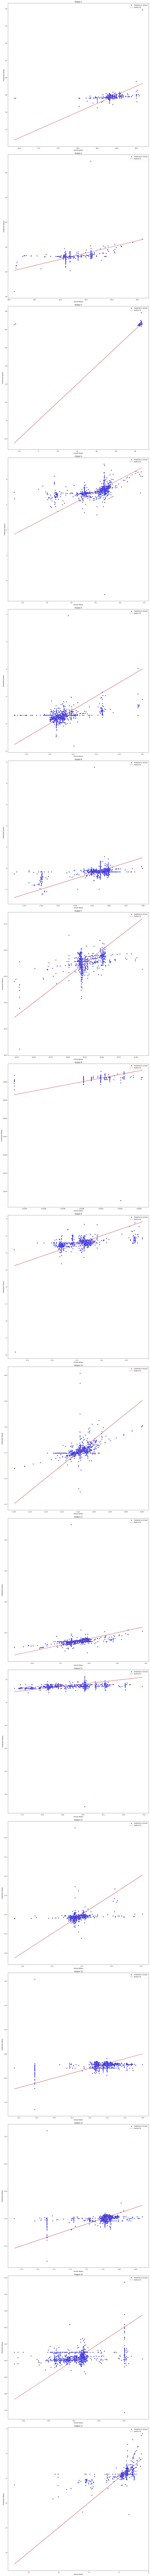

In [58]:
fig, axes = plt.subplots(num_outputs, 1, figsize=(15, 15*num_outputs))

for i in range(num_outputs):
    ax = axes[i] if num_outputs > 1 else axes
    sns.scatterplot(x=y_test[:, i], y=y_pred[:, i], color='blue', label="Predicted vs Actual", ax=ax)
    ax.plot(y_test[:, i], y_test[:, i], color='red', linestyle='dashed', label="Perfect Fit")
    ax.set_xlabel("Actual Values")
    ax.set_ylabel("Predicted Values")
    ax.set_title(f"Output {i+1}")
    ax.legend()

plt.tight_layout()
plt.show()